In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import japanize_matplotlib

In [140]:
df_male = pd.read_csv('census_data/population_by_generation_male.csv',index_col=0).astype('int')
df_female = pd.read_csv('census_data/population_by_generation_female.csv',index_col=0).astype('int')

In [141]:
selected_area = '松山市1区'

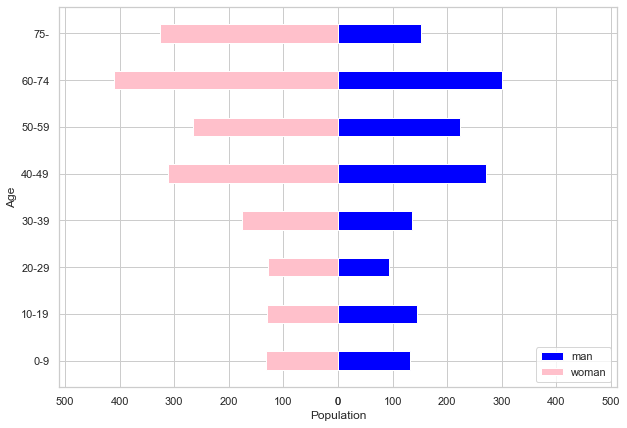

In [142]:

# Seabornスタイルの設定
sns.set(style="whitegrid")

# 最大値を取得し、目盛りの間隔を設定
max_population = max(max(df_male.loc[selected_area,:]), max(df_female.loc[selected_area,:]))
tick_step = int(np.ceil(max_population / 5 / 100.0) * 100)  # 最大値の約20%ごとに目盛りを設定

# グラフの描画
fig, ax = plt.subplots(figsize=(10, 7))

# 棒グラフの描画
ax.barh(df_male.loc[selected_area,:].index, df_male.loc[selected_area,:], color='blue', label='man', height=0.4, align='center')   # 男性
ax.barh(df_male.loc[selected_area,:].index, [-x for x in df_female.loc[selected_area,:]], color='pink', label='woman', height=0.4, align='center')  # 女性

# 横軸を動的に設定
ax.set_xlim(-max_population - tick_step, max_population + tick_step)  # 最大値に余裕を持たせて設定

# 軸ラベルとタイトル
ax.set_xlabel('Population')
ax.set_ylabel('Age')

# 横軸の目盛りを正の値で表示（女性側も正の値を表示）
xticks = list(range(0, max_population + tick_step, tick_step))
ax.set_xticks([-x for x in xticks] + xticks)
ax.set_xticklabels([str(abs(x)) for x in [-x for x in xticks] + xticks])

# 凡例の追加
ax.legend(loc='lower right')
# グリッドの設定
ax.grid(True)
# 描画
plt.show()
st.pyplot(plt)